<a href="https://colab.research.google.com/github/ADnnx/mIA/blob/master/Univariado/Exp2_Sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TFM:\
Predicción de la calidad del aire en Medellín (Colombia) usando Inteligencia Artificial sobre datos abiertos

: Álvaro Bedoya \
UNIR
 
Modelos Univariados (TS10) \
-ARITMA distingue los periodos y componentes de temporalidad estacional sin tendencia \
-SARIMAX mixto tres hiperparametros \


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 
%matplotlib inline
#import os 
#from datetime import datetime 
import datetime as dt

In [ ]:
infile="../../../Datos/SIATA/PM25/raw_PM25_estacion-12_2016-2019.csv"
nombre_columnas=['AÑO','MES','DIA','HORA','MINUTOS','SEGUNDOS','PM25','CALIDAD_PM25','CALIDAD','FOO']
fecha_columnas = {'FECHA': [0,1,2]}
pm25 =  pd.read_csv(infile, delimiter=',', header=0, names=nombre_columnas, parse_dates=fecha_columnas)

In [ ]:
pm25.head(5)

,FECHA,HORA,MINUTOS,SEGUNDOS,PM25,CALIDAD_PM25,CALIDAD,FOO
0,2016-01-01,0,0,0,34.0,1,1,NaN
1,2016-01-01,1,0,0,68.0,1,1,NaN
2,2016-01-01,2,0,0,61.0,1,1,NaN
3,2016-01-01,3,0,0,54.0,1,1,NaN
4,2016-01-01,4,0,0,56.0,1,1,NaN


In [ ]:
print(pm25.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         35064 non-null  datetime64[ns]
 1   HORA          35064 non-null  int64         
 2   MINUTOS       35064 non-null  int64         
 3   SEGUNDOS      35064 non-null  int64         
 4   PM25          35064 non-null  float64       
 5   CALIDAD_PM25  35064 non-null  int64         
 6   CALIDAD       35064 non-null  int64         
 7   FOO           0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 2.1 MB
None


In [ ]:
# Filtrar solo las observaciones "buenas"
pm25Buena = pm25[pm25.CALIDAD_PM25 == 1]

In [ ]:
print(pm25Buena.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32218 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         32218 non-null  datetime64[ns]
 1   HORA          32218 non-null  int64         
 2   MINUTOS       32218 non-null  int64         
 3   SEGUNDOS      32218 non-null  int64         
 4   PM25          32218 non-null  float64       
 5   CALIDAD_PM25  32218 non-null  int64         
 6   CALIDAD       32218 non-null  int64         
 7   FOO           0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 2.2 MB
None


In [ ]:
# Imputación de observaciones faltantes o malas marcadas con el valor -999.0000 en PM25 y la bandera 151 en CALIDAD_PM25, reemplazando por el valor medio de PM25
pm25_median = pm25Buena.PM25.median()
pm25= pm25.replace(-999.0000, pm25_median)

In [ ]:
# Eliminar columnas innecesarias CALIDAD_PM25, CALIDAD, FOO
pm25.drop(['CALIDAD_PM25', 'CALIDAD', 'FOO'], axis='columns', inplace=True)

In [ ]:
print(pm25.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FECHA     35064 non-null  datetime64[ns]
 1   HORA      35064 non-null  int64         
 2   MINUTOS   35064 non-null  int64         
 3   SEGUNDOS  35064 non-null  int64         
 4   PM25      35064 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.3 MB
None


In [ ]:
pm25

,FECHA,HORA,MINUTOS,SEGUNDOS,PM25
0,2016-01-01,0,0,0,34.0
1,2016-01-01,1,0,0,68.0
2,2016-01-01,2,0,0,61.0
3,2016-01-01,3,0,0,54.0
4,2016-01-01,4,0,0,56.0
...,...,...,...,...,...
35059,2019-12-31,19,0,0,21.0
35060,2019-12-31,20,0,0,19.0
35061,2019-12-31,21,0,0,33.0
35062,2019-12-31,22,0,0,39.0


In [ ]:
pm25['FECHA'].min(), pm25['FECHA'].max() 

(Timestamp('2016-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [ ]:
#df1=df.groupby('Fecha2')['PM25'].mean().reset_index()

# Indización de de la serie de tiempo

In [ ]:
pm25=pm25.set_index('FECHA')

In [ ]:
pm25

,HORA,MINUTOS,SEGUNDOS,PM25
FECHA,,,,
2016-01-01,0,0,0,34.0
2016-01-01,1,0,0,68.0
2016-01-01,2,0,0,61.0
2016-01-01,3,0,0,54.0
2016-01-01,4,0,0,56.0
...,...,...,...,...
2019-12-31,19,0,0,21.0
2019-12-31,20,0,0,19.0
2019-12-31,21,0,0,33.0


In [ ]:
type(pm25)

pandas.core.frame.DataFrame

In [ ]:
# Convertir a serie de tiempo a frecuencia daaria
y = pm25['PM25'].resample('D').mean()

In [ ]:
type(y)

pandas.core.series.Series

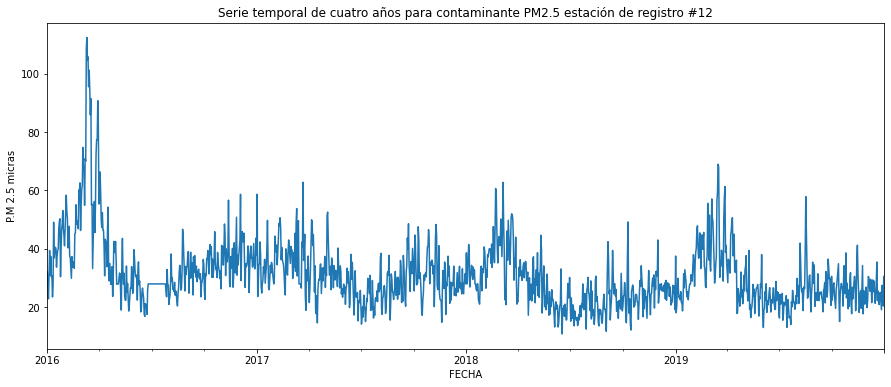

In [ ]:
## Visualización de datos de series tiempo
import matplotlib.pyplot as plt
plt.ylabel("P.M 2.5 micras")
plt.title('Serie temporal de cuatro años para contaminante PM2.5 estación de registro #12')
y.plot (figsize = (15, 6))  
plt.show()
plt.show()

DESCOMPONER SERIE

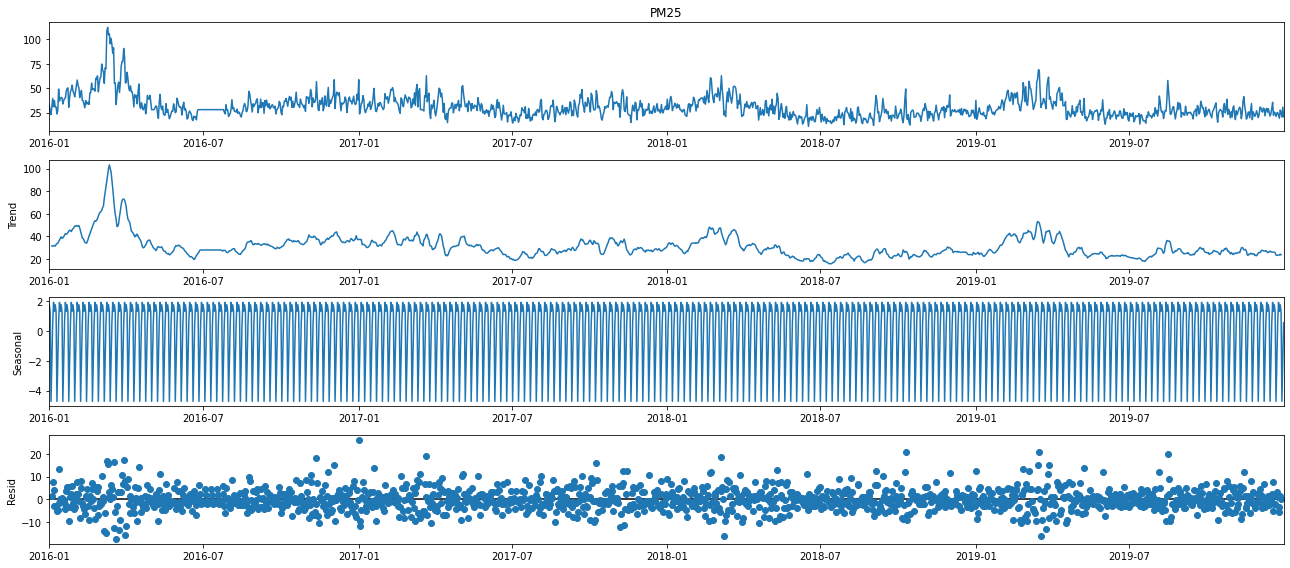

In [ ]:
from pylab import rcParams 
import statsmodels.api as sm 
rcParams['figure.figsize'] = 18, 8 
sm.tsa.seasonal_decompose(y, model= 'additive')
des = sm.tsa.seasonal_decompose(y, model= 'additive')
fig = des.plot() 
plt.show() 

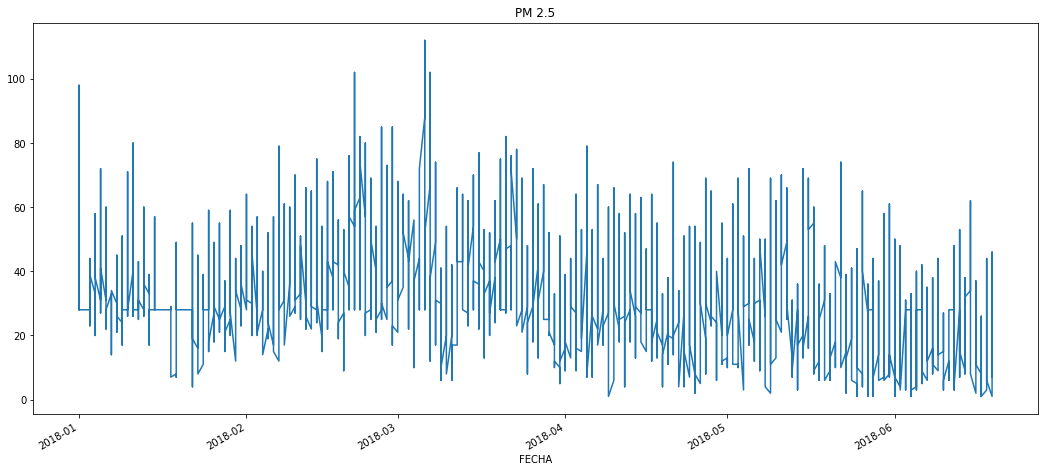

In [ ]:
pm25['PM25']['2018-01-01':'2018-06-19'].plot(title='PM 2.5') 

In [ ]:
import itertools 
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) 
seasonal_pdq = [(x[0], x[1], x[2], 365) for x in list(itertools.product(p,d,q))]
print('Ejemplo de parametro para estacional ARIMA') 
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1])) 
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Ejemplo de parametro para estacional ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 365)
SARIMAX: (0, 0, 1) x (0, 1, 0, 365)
SARIMAX: (0, 1, 0) x (0, 1, 1, 365)
SARIMAX: (0, 1, 0) x (1, 0, 0, 365)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

## valor menor ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:	9440,713499
## ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:10504.152644147713
## C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
##  "Check mle_retvals", ConvergenceWarning)

ARIMA(0, 0, 0)x(0, 0, 0, 365)12 - AIC:14358.42345357385
ARIMA(0, 0, 0)x(0, 0, 1, 365)12 - AIC:9994.462426011562


MemoryError: Unable to allocate 1.46 GiB for an array with shape (366, 366, 1462) and data type float64

In [ ]:
print("pdq ", results.summary())

pdq                                       SARIMAX Results                                      
Dep. Variable:                               PM25   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4773.237
Date:                            Wed, 15 Jul 2020   AIC                           9556.474
Time:                                    18:28:07   BIC                           9582.864
Sample:                                01-01-2016   HQIC                          9566.323
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5126      0.023     22.655      0.000       0.468       0.557
ma.L1         -0.8884      0.0

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_sttionarity=False,
                                enforce_invertibility=False) 
results = mod.fit() 
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5126      0.023     22.655      0.000       0.468       0.557
ma.L1         -0.8884      0.013    -66.493      0.000      -0.915      -0.862
ar.S.L12       0.0009      0.025      0.037      0.971      -0.047       0.049
ma.S.L12      -1.0000      3.409     -0.293      0.769      -7.682       5.682
sigma2        41.0351    139.799      0.294      0.769    -232.966     315.036


In [ ]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               PM25   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4773.237
Date:                            Wed, 15 Jul 2020   AIC                           9556.474
Time:                                    18:18:14   BIC                           9582.864
Sample:                                01-01-2016   HQIC                          9566.323
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5126      0.023     22.655      0.000       0.468       0.557
ma.L1         -0.8884      0.013   

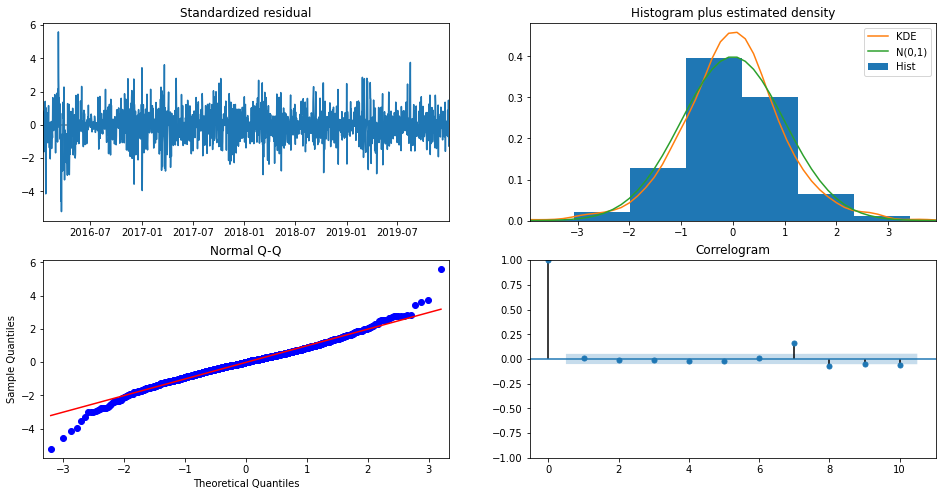

In [ ]:
results.plot_diagnostics(figsize=(16,8)) 
plt.show()

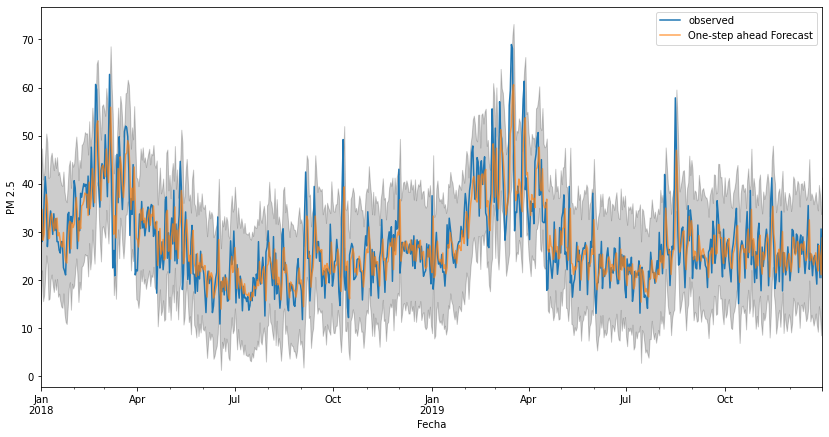

In [ ]:
## Validar pronósticos 
import pandas as pd
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynanic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('PM 2.5')
plt.legend()

In [ ]:
# **Error**
pred.predicted_mean

FECHA
2018-01-01    27.745915
2018-01-02    34.696723
2018-01-03    28.285182
2018-01-04    29.582950
2018-01-05    33.580108
                ...    
2019-12-27    21.885666
2019-12-28    27.176227
2019-12-29    25.141651
2019-12-30    21.138009
2019-12-31    28.747298
Freq: D, Length: 730, dtype: float64

In [ ]:
y_predi= pred.predicted_mean
y_real= y['2018-01-01':]
mse = ((y_predi - y_real) ** 2).mean()
mse
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 5.92


In [ ]:
y['2018-01-01':]

FECHA
2018-01-01    38.625000
2018-01-02    28.000000
2018-01-03    29.125000
2018-01-04    36.750000
2018-01-05    41.500000
                ...    
2019-12-27    27.500000
2019-12-28    25.208333
2019-12-29    20.500000
2019-12-30    30.625000
2019-12-31    20.541667
Freq: D, Name: PM25, Length: 730, dtype: float64

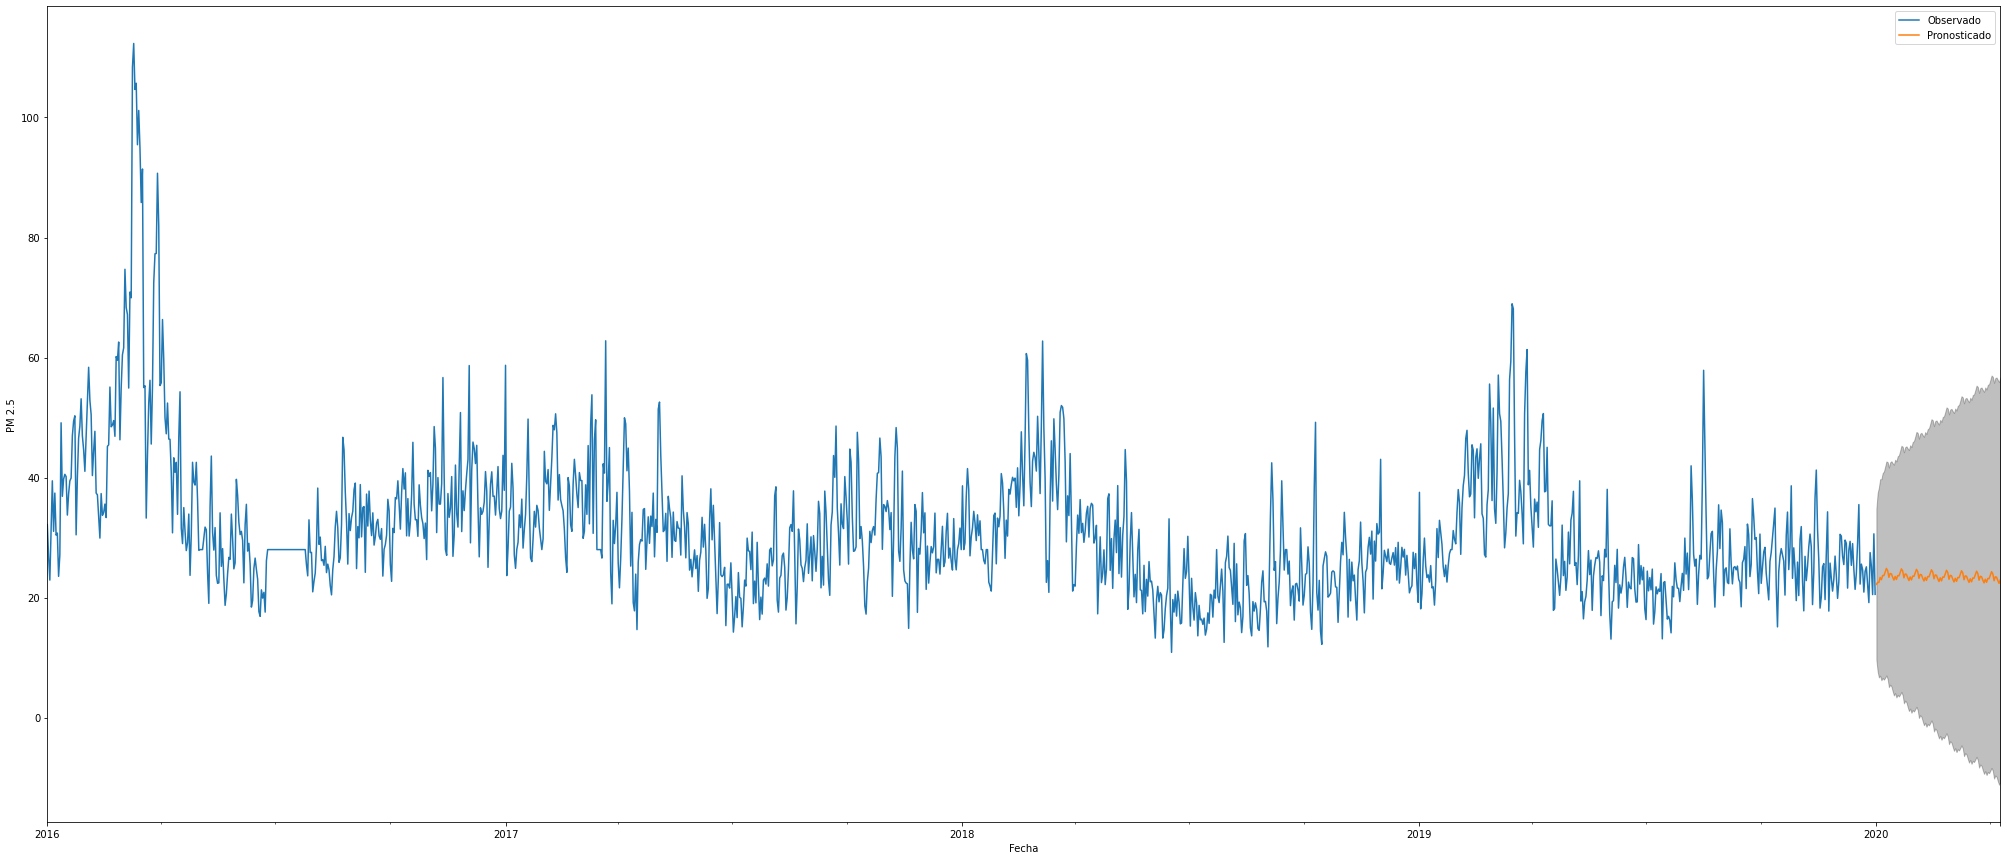

In [ ]:
## Producciendo Pronosticos Futuros
pred_uc = results.get_forecast(steps=100) ## steps=24
pred_ci = pred_uc.conf_int() 
ax = y.plot(label='Observado', figsize=(35, 15)) 
pred_uc.predicted_mean.plot(ax=ax, label='Pronosticado') 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='k', alpha=0.25) 
ax.set_xlabel('Fecha') 
ax.set_ylabel('PM 2.5') 
plt.legend() 
plt.show()

In [ ]:
proy = pred_uc.predicted_mean 
proy = pd.DataFrame(proy) 
proy.columns = ['Proyeccion'] 

In [ ]:
## Valores reates 
proy1 = pd.DataFrame(y_real) 
proy1.columns = ['Proyeccion'] 
proy1.info() 
print(proy1.head(3))
 
data = pd.concat([proy1,proy]) 
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Proyeccion  730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB
            Proyeccion
FECHA                 
2018-01-01      38.625
2018-01-02      28.000
2018-01-03      29.125


,Proyeccion
2018-01-01,38.625000
2018-01-02,28.000000
2018-01-03,29.125000
2018-01-04,36.750000
2018-01-05,41.500000
...,...
2020-04-05,23.470429
2020-04-06,23.404632
2020-04-07,22.844583
2020-04-08,22.370647


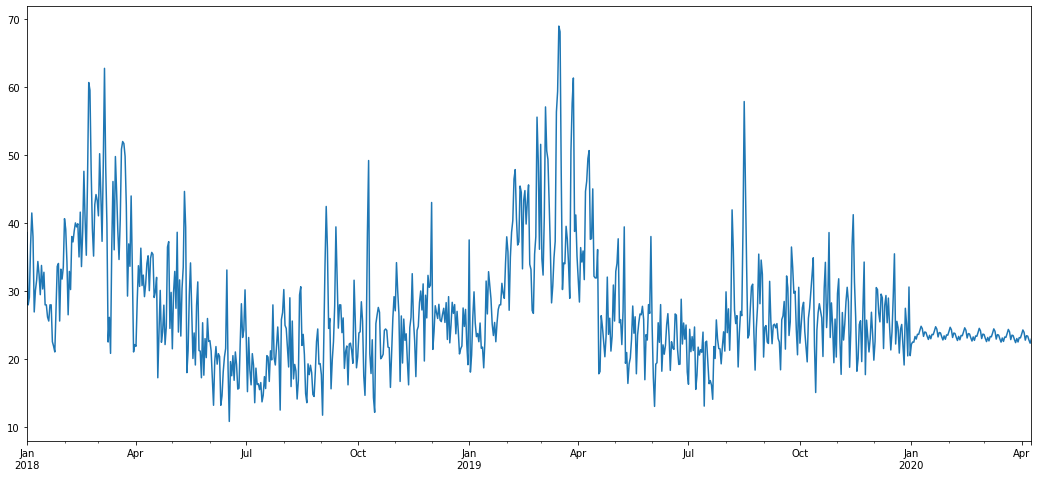

In [ ]:
data['Proyeccion'].plot(label='Pronostico') 

In [ ]:
pro = data.loc["2020-01-01"]
pro

Proyeccion    22.21242
Name: 2020-01-01 00:00:00, dtype: float64

In [ ]:
pro = data.loc["2020-03-21"]
pro

Proyeccion    24.394535
Name: 2020-03-21 00:00:00, dtype: float64